Average in-sample score: 0.15
Average out-of-sample score: -0.1


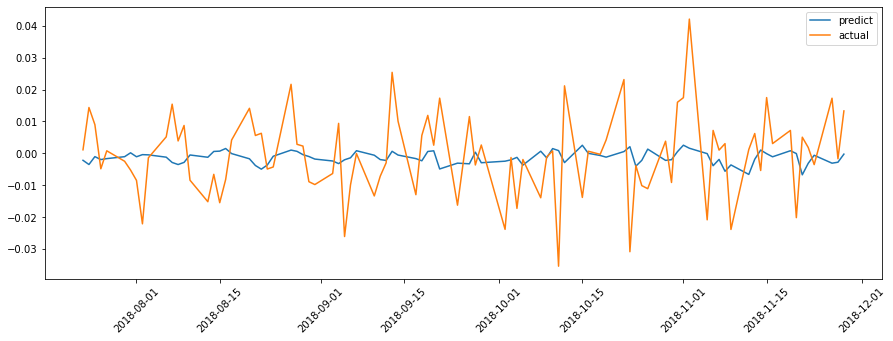

In [6]:
################################ Settings ################################
n_splits = 100                   # Number of splits
data_path = "../Data/hsi.csv"   # Path to data

############################## Part I: Data ##############################
import pandas as pd
import numpy as np

# Import stock data, keep only two variables and drop missing data
data = pd.read_csv(data_path)
data = data[["Date","Adj Close"]]
data = data.dropna()

# Convert date to pandas datetime format and 
# Use date as the index of the dataframe
data["Date"] = pd.to_datetime(data["Date"])
data.index = pd.DatetimeIndex(data["Date"])

# Calculate variables of interest
# Return since the previous day
data["daily_return"] = (data["Adj Close"] /
                                     data.shift(1)["Adj Close"]
                                     - 1)
# 90-day future return
data["90d_return"] = (data.shift(-90)["Adj Close"] / 
                                   data["Adj Close"]
                                   - 1)

# 14-day Lag terms
X_list = []
for t in range(1,16):
    varname = "ret_"+str(t)
    data[varname] = data["daily_return"].shift(t)
    X_list.append(varname)
    
# Drop samples with missing lag terms
data = data.dropna()
    
# Specify target and features
y = data[["daily_return"]]
X = data[X_list]

#################### Part II: Model and Experimentation ####################
from sklearn.linear_model import LinearRegression, Ridge   
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

model = Ridge(alpha=0.01)
tscv = TimeSeriesSplit(n_splits=n_splits,max_train_size=60)
train_score_list = []
test_score_list = []
prediction_list = []

# Loop through the splits. Run a model for each split.
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    
    # Fetch data based on split
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    # Fit the model
    model.fit(X_train,y_train)
    
    # Record score and prediction
    train_score_list.append(model.score(X_train,y_train))
    test_score_list.append(model.score(X_test,y_test))
    prediction = model.predict(X_test)
    prediction_list.append(prediction)

    
######################### Part III: Report Results #########################   
print("Average in-sample score:",round(np.mean(train_score_list),2))    
print("Average out-of-sample score:",round(np.mean(test_score_list),2))    

# Chart
prediction = np.asarray(prediction_list).flatten()
prediction = prediction[-90:]
actual = y[-1*len(prediction):].to_numpy()
dates = data["Date"].to_numpy()
dates = dates[-1*len(prediction):]

import matplotlib.pyplot as plt
plt.plot(dates,prediction,label="predict")
plt.plot(dates,actual,label="actual")
plt.rcParams["figure.figsize"] = (15,5)
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
#https://machinelearningmastery.com/make-sample-forecasts-arima-python/
################################ Settings ################################
n_splits = 100                   # Number of splits
data_path = "../Data/hsi.csv"   # Path to data

############################## Part I: Data ##############################
import pandas as pd
import numpy as np

# Import stock data, keep only two variables and drop missing data
data = pd.read_csv(data_path)
data = data[["Date","Adj Close"]]
data = data.dropna()

# Convert date to pandas datetime format and 
# Use date as the index of the dataframe
data["Date"] = pd.to_datetime(data["Date"])
data.index = pd.DatetimeIndex(data["Date"])

# Calculate variables of interest
# Return since the previous day
data["daily_return"] = (data["Adj Close"] /
                                     data.shift(1)["Adj Close"]
                                     - 1)
# 90-day future return
data["90d_return"] = (data.shift(-90)["Adj Close"] / 
                                   data["Adj Close"]
                                   - 1)

# 14-day Lag terms
X_list = []
for t in range(1,16):
    varname = "ret_"+str(t)
    data[varname] = data["daily_return"].shift(t)
    X_list.append(varname)
    
# Drop samples with missing lag terms
data = data.dropna()
    
# Specify target and features
y = data[["daily_return"]]
X = data[X_list]

#################### Part II: Model and Experimentation ####################
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

model = Ridge(alpha=0.01)
tscv = TimeSeriesSplit(n_splits=n_splits,max_train_size=60)
train_score_list = []
test_score_list = []
prediction_list = []

# Loop through the splits. Run a model for each split.
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    
    # Fetch data based on split
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    # Fit the model
    model.fit(X_train,y_train)
    
    # Record score and prediction
    train_score_list.append(model.score(X_train,y_train))
    test_score_list.append(model.score(X_test,y_test))
    prediction = model.predict(X_test)
    prediction_list.append(prediction)

    
######################### Part III: Report Results #########################   
print("Average in-sample score:",round(np.mean(train_score_list),2))    
print("Average out-of-sample score:",round(np.mean(test_score_list),2))    

# Chart
prediction = np.asarray(prediction_list).flatten()
prediction = prediction[-90:]
actual = y[-1*len(prediction):].to_numpy()
dates = data["Date"].to_numpy()
dates = dates[-1*len(prediction):]

import matplotlib.pyplot as plt
plt.plot(dates,prediction,label="predict")
plt.plot(dates,actual,label="actual")
plt.rcParams["figure.figsize"] = (15,5)
plt.xticks(rotation=45)
plt.legend()
plt.show()
